In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import boxcox

In [4]:
pd.set_option('display.width', 1000)

In [5]:
data = pd.read_csv(r"D:\Study\Sem VI\Smart-Building-Maintenance-Prediction-\New Data\Dataset\2018Floor1.csv")

Basic Information About the Dataset:

In [6]:
data.shape

(264960, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          264960 non-null  object 
 1   z1_Light(kW)  263499 non-null  float64
 2   z1_Plug(kW)   264474 non-null  float64
 3   z2_AC1(kW)    263442 non-null  float64
 4   z2_AC2(kW)    263503 non-null  float64
 5   z2_AC3(kW)    263503 non-null  float64
 6   z2_AC4(kW)    263503 non-null  float64
 7   z2_Light(kW)  263526 non-null  float64
 8   z2_Plug(kW)   235125 non-null  float64
 9   z3_Light(kW)  264446 non-null  float64
 10  z3_Plug(kW)   263503 non-null  float64
 11  z4_Light(kW)  264445 non-null  float64
dtypes: float64(11), object(1)
memory usage: 24.3+ MB


In [8]:
data.head()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86


In [9]:
data.tail()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
264955,2018-12-31 23:55:00,0.01,0.57,49.30,1.37,0.01,0.01,18.03,14.09,10.21,0.37,14.58
264956,2018-12-31 23:56:00,0.01,0.57,45.44,1.36,0.01,0.00,17.72,11.37,10.13,0.38,14.60
264957,2018-12-31 23:57:00,0.01,0.58,2.31,1.36,0.01,0.01,17.48,11.35,10.07,0.38,14.57
264958,2018-12-31 23:58:00,0.02,0.57,2.31,1.35,0.00,0.00,17.43,11.39,9.99,0.37,14.59
264959,2018-12-31 23:59:00,0.00,0.56,2.31,1.36,0.01,0.01,17.42,11.38,10.05,0.38,14.59


In [10]:
data.describe()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
count,263499.000000,264474.000000,263442.000000,263503.000000,263503.000000,263503.000000,263526.000000,235125.000000,264446.000000,263503.000000,264445.000000
mean,6.388401,4.182152,29.007512,4.769192,0.009434,0.007446,14.754283,15.625258,23.582280,1.163607,17.114397
std,8.758483,6.938276,22.099131,12.370302,0.048780,0.008278,3.153056,2.595695,16.837519,0.719731,18.517960
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.640000,0.040000,0.020000,0.010000,0.000000,13.200000,14.360000,13.240000,0.760000,0.060000
50%,0.020000,0.870000,44.280000,0.020000,0.010000,0.010000,14.800000,15.890000,20.770000,0.920000,9.910000
75%,12.980000,1.260000,47.030000,0.030000,0.010000,0.010000,16.300000,17.090000,27.410000,1.480000,34.010000
max,134.970000,57.860000,131.550000,798.720000,24.950000,0.060000,55.280000,55.120000,4762.430000,22.220000,512.010000


In [11]:
total_data = len(data)
print("Total df:",total_data)

Total df: 264960


Finding Null Values in Each Column 

In [12]:
data.isnull().values.any()

True

In [13]:
data.describe().iloc[0]

z1_Light(kW)    263499.0
z1_Plug(kW)     264474.0
z2_AC1(kW)      263442.0
z2_AC2(kW)      263503.0
z2_AC3(kW)      263503.0
z2_AC4(kW)      263503.0
z2_Light(kW)    263526.0
z2_Plug(kW)     235125.0
z3_Light(kW)    264446.0
z3_Plug(kW)     263503.0
z4_Light(kW)    264445.0
Name: count, dtype: float64

In [14]:
data.isnull().sum()

Date                0
z1_Light(kW)     1461
z1_Plug(kW)       486
z2_AC1(kW)       1518
z2_AC2(kW)       1457
z2_AC3(kW)       1457
z2_AC4(kW)       1457
z2_Light(kW)     1434
z2_Plug(kW)     29835
z3_Light(kW)      514
z3_Plug(kW)      1457
z4_Light(kW)      515
dtype: int64

In [19]:
# Assuming 'df' is your DataFrame
null_percentage = data.isnull().mean() * 100

# Display the percentage of null values for each column
print(null_percentage)

Date             0.000000
z1_Light(kW)     0.551404
z1_Plug(kW)      0.183424
z2_AC1(kW)       0.572917
z2_AC2(kW)       0.549894
z2_AC3(kW)       0.549894
z2_AC4(kW)       0.549894
z2_Light(kW)     0.541214
z2_Plug(kW)     11.260190
z3_Light(kW)     0.193992
z3_Plug(kW)      0.549894
z4_Light(kW)     0.194369
dtype: float64


In [21]:
# Step 1: Identify the "Plug" columns
plug_columns = data.filter(like='Plug').columns

# Step 2: Fill null values in the "Plug" columns with the mean of each respective column
data[plug_columns] = data[plug_columns].fillna(data[plug_columns].mean())

In [22]:
data.isnull().sum()

Date               0
z1_Light(kW)    1461
z1_Plug(kW)        0
z2_AC1(kW)      1518
z2_AC2(kW)      1457
z2_AC3(kW)      1457
z2_AC4(kW)      1457
z2_Light(kW)    1434
z2_Plug(kW)        0
z3_Light(kW)     514
z3_Plug(kW)        0
z4_Light(kW)     515
dtype: int64

Removing Null Values from the Dataset

In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

Date            0
z1_Light(kW)    0
z1_Plug(kW)     0
z2_AC1(kW)      0
z2_AC2(kW)      0
z2_AC3(kW)      0
z2_AC4(kW)      0
z2_Light(kW)    0
z2_Plug(kW)     0
z3_Light(kW)    0
z3_Plug(kW)     0
z4_Light(kW)    0
dtype: int64

In [25]:
new_total_data = len(data)
print("Total data after removing null data:", new_total_data)

Total data after removing null data: 263418


In [26]:
removed_data = total_data - new_total_data
print("Removed data:", removed_data)

Removed data: 1542


Handling Outliers

In [28]:
from scipy import stats

# Assuming 'data' is your DataFrame
# Calculate z-scores for each column
z_scores = stats.zscore(data.select_dtypes(include=['float64']), axis=0)

# Threshold for identifying outliers
threshold = 3

# Absolute z-scores above threshold indicate outliers
outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

# Select rows containing outliers
outliers = data[outlier_mask]

# Calculate the number of outliers
num_outliers = outliers.shape[0]

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / data.shape[0]) * 100

# Display the number of outliers and percentage of outliers
print("Number of outliers:", num_outliers)
print("Percentage of outliers:", percentage_outliers)


Number of outliers: 18525
Percentage of outliers: 7.032549028540192


In [29]:
data_no_outliers = data[~outlier_mask]
summary_stats_no_outliers = data_no_outliers.describe()

In [30]:
df = pd.DataFrame(data_no_outliers)

In [ ]:
# create csv of the data with no outliers
df.to_csv('data_no_outliers.csv', index=False)

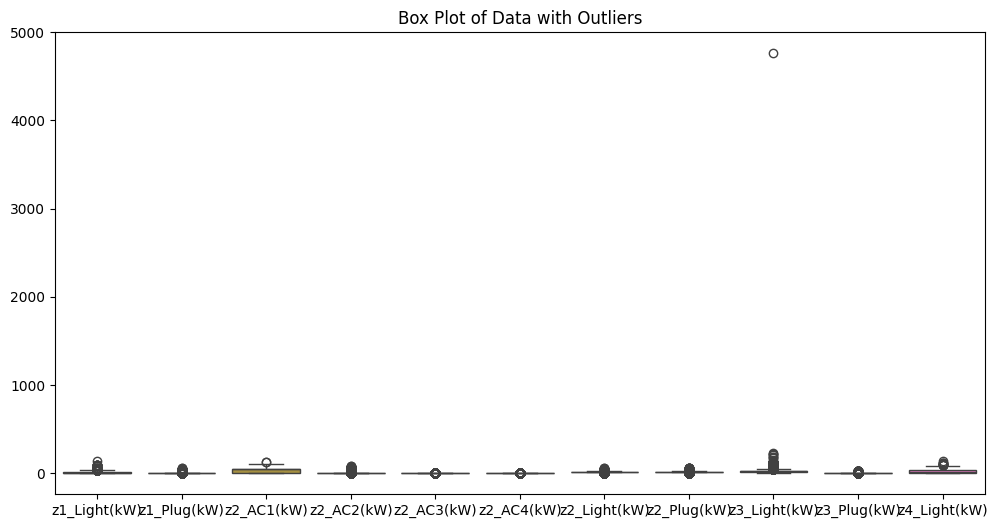

In [31]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64']))
plt.title('Box Plot of Data with Outliers')
plt.show()

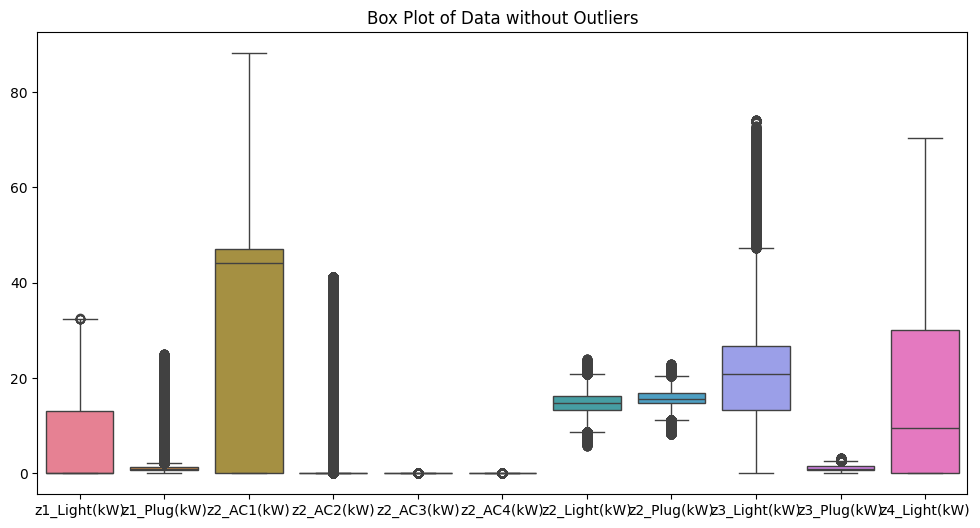

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers.select_dtypes(include=['float64']))
plt.title('Box Plot of Data without Outliers')
plt.show()

In [36]:
df.shape

(244893, 12)

In [39]:
eda_df = df.drop(columns=['Date'])

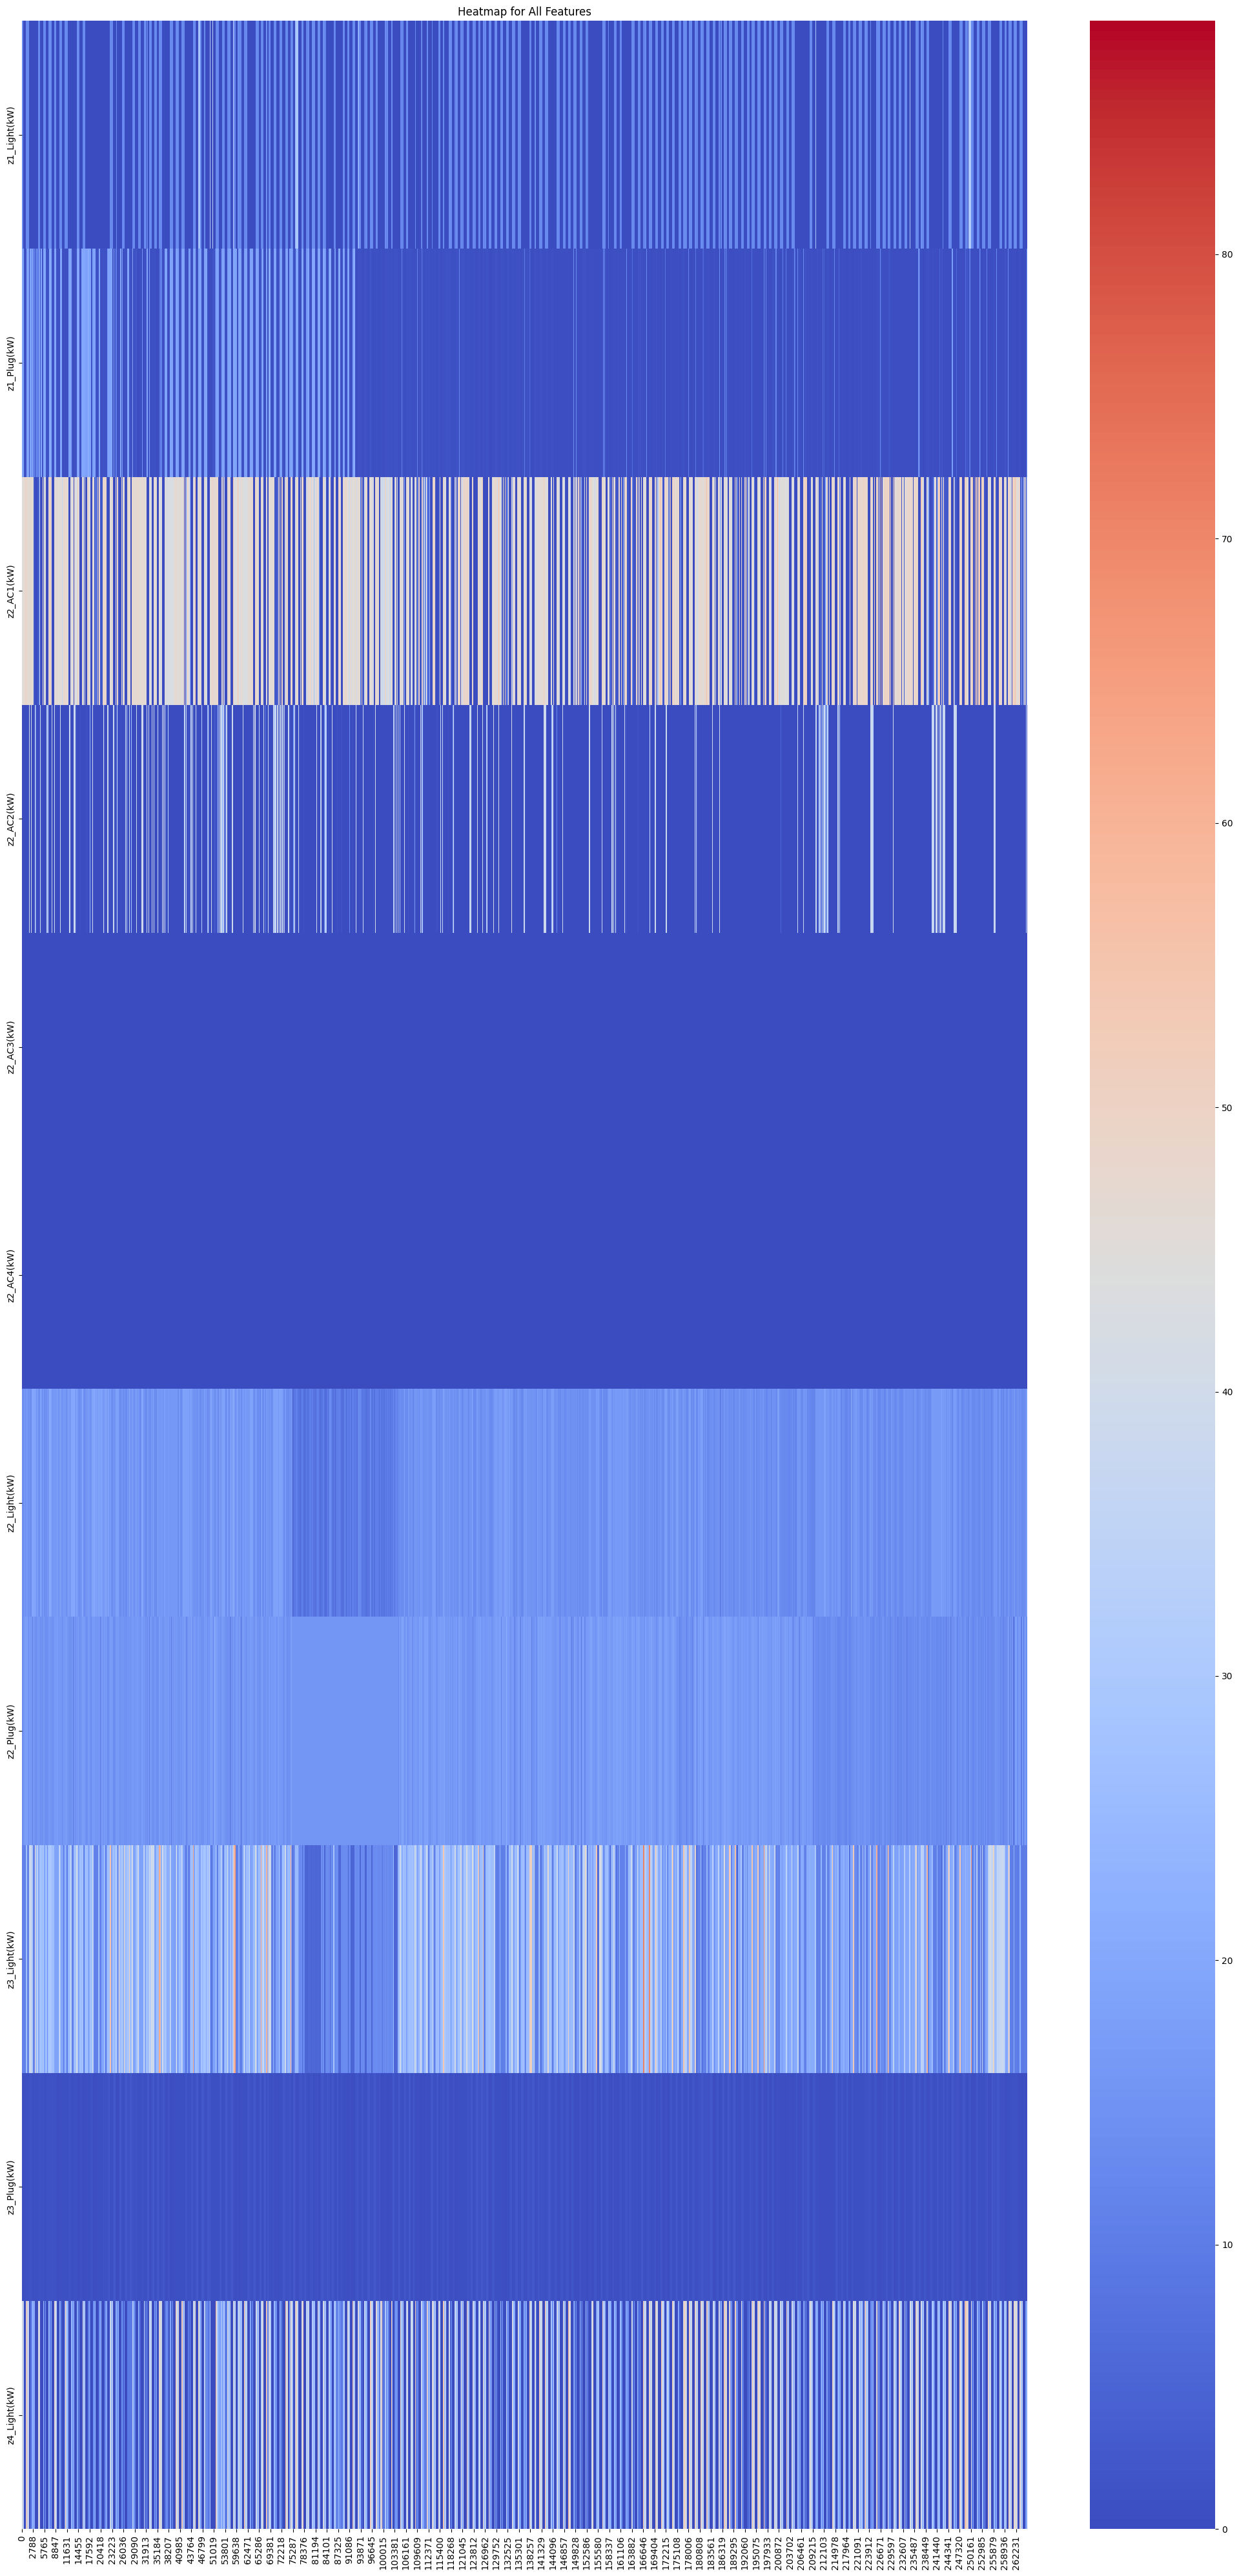

In [43]:
# Heatmap for all features
plt.figure(figsize=(20, 40))
sns.heatmap(eda_df.T, cmap='coolwarm', cbar=True)
plt.title("Heatmap for All Features")
plt.tight_layout()
plt.show()

Running Basic Machine Learnong Algorithms on the Dataset

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [47]:
df.drop(columns=['Date'], inplace=True)

In [48]:
X = df.drop('z1_Plug(kW)', axis=1)  # Features: All columns except 'z1_Plug(kW)'
y = df['z1_Plug(kW)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [50]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features
linear_regression_model = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=10),  # Adjust k as needed
    PolynomialFeatures(degree=2),  # You can adjust the degree as needed
    LinearRegression()
)

linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:
Mean Squared Error: 33.73896300958487
Mean Absolute Error: 4.147566984153528
R-squared: 0.1959871140262195


In [51]:
# Linear Regression with Polynomial Features
linear_regression_model_poly = LinearRegression()
linear_regression_model_poly.fit(X_train_poly, y_train)
y_pred_lr_poly = linear_regression_model_poly.predict(X_test_poly)
mse_lr_poly = mean_squared_error(y_test, y_pred_lr_poly)
mae_lr_poly = mean_absolute_error(y_test, y_pred_lr_poly)
r2_lr_poly = r2_score(y_test, y_pred_lr_poly)

print("Linear Regression with Polynomial Features:")
print("Mean Squared Error:", mse_lr_poly)
print("Mean Absolute Error:", mae_lr_poly)
print("R-squared:", r2_lr_poly)

Linear Regression with Polynomial Features:
Mean Squared Error: 33.73896300958487
Mean Absolute Error: 4.147566984153528
R-squared: 0.1959871140262195


In [52]:
# Decision Tree with specific parameters
decision_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)


Decision Tree:
Mean Squared Error: 30.79356373739464
Mean Absolute Error: 3.6369699025325746
R-squared: 0.26617714827552297


In [53]:
# Random Forest with specific parameters
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


Random Forest:
Mean Squared Error: 29.972520553542292
Mean Absolute Error: 3.616844332171902
R-squared: 0.2857429333759923


In [54]:
# K-Nearest Neighbors with specific parameters
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)


K-Nearest Neighbors:
Mean Squared Error: 8.125241461279323
Mean Absolute Error: 1.015447477490353
R-squared: 0.8063722695134077


In [56]:
from sklearn.linear_model import Ridge

# Ridge Regression with specific parameters
ridge_regression_model = Ridge(alpha=0.5)  # You can adjust the alpha parameter
ridge_regression_model.fit(X_train, y_train)
y_pred_ridge = ridge_regression_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
Mean Squared Error: 38.48069676605834
Mean Absolute Error: 4.4802668275327635
R-squared: 0.08298971570729496


Deep Learning Modelss 

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# Multilayer Perceptron (MLP) with specific parameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nMultilayer Perceptron (MLP):")
print("Mean Squared Error:", mse_mlp)
print("Mean Absolute Error:", mae_mlp)
print("R-squared:", r2_mlp)


Multilayer Perceptron (MLP):
Mean Squared Error: 16.37342929270314
Mean Absolute Error: 2.4842423711823187
R-squared: 0.6098146782053139


In [59]:
# Gradient Boosting Regressor with specific parameters
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, loss='squared_error')
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared:", r2_gb)


Gradient Boosting Regressor:
Mean Squared Error: 16.621852178579537
Mean Absolute Error: 2.5275730988387686
R-squared: 0.6038946621882633


In [60]:
# Collecting evaluation metrics of all models into a dictionary
pd.set_option('display.width', 1000)
results_dict = {
    "Linear Regression": [mse_lr, mae_lr, r2_lr],
    "Decision Tree": [mse_dt, mae_dt, r2_dt],
    "Random Forest": [mse_rf, mae_rf, r2_rf],
    "K-Nearest Neighbors": [mse_knn, mae_knn, r2_knn],
    "Multilayer Perceptron (MLP)": [mse_mlp, mae_mlp, r2_mlp],
    "Gradient Boosting Regressor": [mse_gb, mae_gb, r2_gb]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results_dict, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

# Transpose the DataFrame for better readability
results_df = results_df.T

print("Model Comparison:")
print(results_df)

Model Comparison:
                             Mean Squared Error  Mean Absolute Error  R-squared
Linear Regression                     33.738963             4.147567   0.195987
Decision Tree                         30.793564             3.636970   0.266177
Random Forest                         29.972521             3.616844   0.285743
K-Nearest Neighbors                    8.125241             1.015447   0.806372
Multilayer Perceptron (MLP)           16.373429             2.484242   0.609815
Gradient Boosting Regressor           16.621852             2.527573   0.603895
